In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [27]:
trump = pd.read_csv('trump_rnn.csv')
trump.head()

,id,created_at,source,year,month,day,hour,day_of_week,week,is_reply,...,tb_orientation,tb_explanatory,vd_neg,vd_neu,vd_pos,vd_compound,vd_orientation,k_cluster,a_cluster,orientation
0,1256024228777857025,Fri May 01 00:54:46 +0000 2020,Twitter for iPhone,2020,4,30,20,4,17,False,...,negative,subjective,0.373,0.627,0.000,-0.8786,negative,24,0,negative
1,1256016249169084417,Fri May 01 00:23:04 +0000 2020,Twitter for iPhone,2020,4,30,20,4,17,False,...,positive,subjective,0.205,0.671,0.123,-0.4168,negative,24,0,positive
2,1256013240896835585,Fri May 01 00:11:06 +0000 2020,Twitter for iPhone,2020,4,30,20,4,17,True,...,positive,objective,0.072,0.740,0.189,0.6885,positive,12,0,positive
3,1256013239487549441,Fri May 01 00:11:06 +0000 2020,Twitter for iPhone,2020,4,30,20,4,17,False,...,positive,subjective,0.046,0.640,0.314,0.9439,positive,24,0,positive
4,1255926261068763143,Thu Apr 30 18:25:29 +0000 2020,Twitter for iPhone,2020,4,30,14,4,17,False,...,positive,objective,0.000,1.000,0.000,0.0000,neutral,24,0,positive


# evaluation of RNN against TextBlob and Vader

In [28]:
# vader
orientation = trump[trump['vd_orientation'] != trump['tb_orientation']][['tb_orientation', 'vd_orientation', 'orientation']]
orientation.groupby(['vd_orientation', 'orientation']).size().unstack()

orientation,negative,neutral,positive
vd_orientation,,,
negative,241,92,327
neutral,46,36,100
positive,145,48,447


In [29]:
# textblob
orientation.groupby(['tb_orientation', 'orientation']).size().unstack()

orientation,negative,neutral,positive
tb_orientation,,,
negative,124,19,146
neutral,115,120,379
positive,193,37,349


# overall orientation

In [30]:
# number of tweets
all_cluster = trump.groupby('orientation')['orientation'].size()
all_cluster.head()

orientation
negative    1277
neutral      442
positive    3020
Name: orientation, dtype: int64

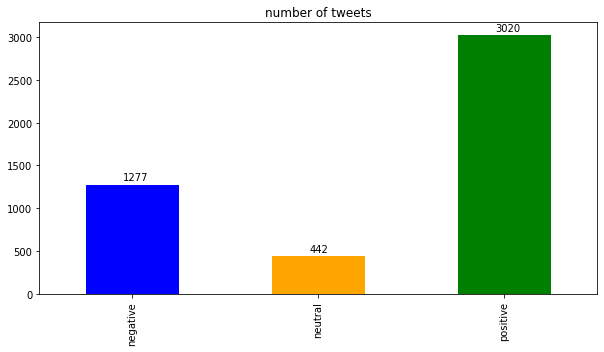

<Figure size 432x288 with 0 Axes>

In [34]:
# number of tweets
# more positive tweets than negative tweets
fig, ax = plt.subplots()  
for i, v in enumerate(all_cluster.values):
    ax.text(i-.05, v+50, str(v), color='black')
all_cluster.plot(kind='bar', figsize=(10,5), color=['blue', 'orange', 'green'])
plt.xlabel('')
plt.title('number of tweets')
plt.show()

In [35]:
# sum of retweet_count
retweet = trump.groupby('orientation')['retweet_count'].sum()
retweet.head()

orientation
negative    27194409.0
neutral      8602356.0
positive    56314509.0
Name: retweet_count, dtype: float64

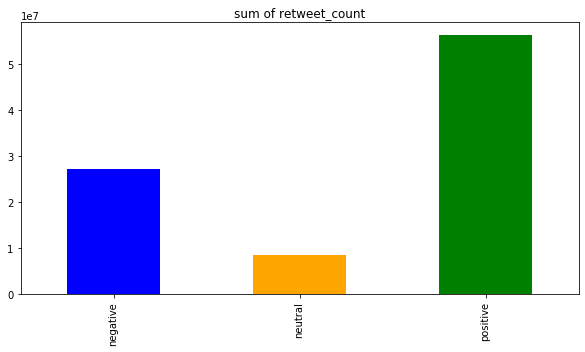

In [36]:
# sum of retweet_count
# similar distribution of number of tweets
retweet.plot(kind='bar', figsize=(10,5), color=['blue', 'orange', 'green'])
plt.xlabel('')
plt.title('sum of retweet_count')
plt.show()

In [37]:
# sum of favorite_count
favorite = trump.groupby('orientation')['favorite_count'].sum()
favorite.head()

orientation
negative    116802022.0
neutral      37754296.0
positive    261275343.0
Name: favorite_count, dtype: float64

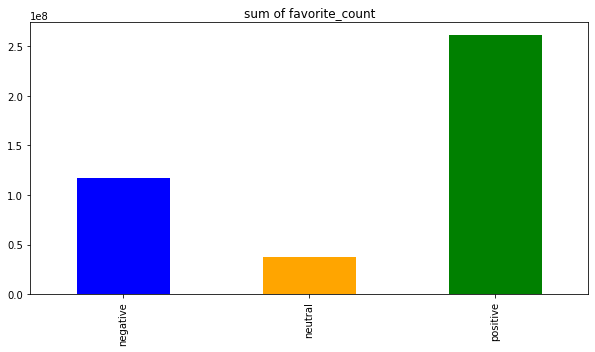

In [38]:
# sum of favorite_count
# similar distribution of number of tweets
favorite.plot(kind='bar', figsize=(10,5), color=['blue', 'orange', 'green'])
plt.xlabel('')
plt.title('sum of favorite_count')
plt.show()

In [39]:
# average retweet_count
retweet = trump.groupby('orientation')['retweet_count'].mean()
retweet.head()

orientation
negative    21295.543461
neutral     19462.343891
positive    18647.188411
Name: retweet_count, dtype: float64

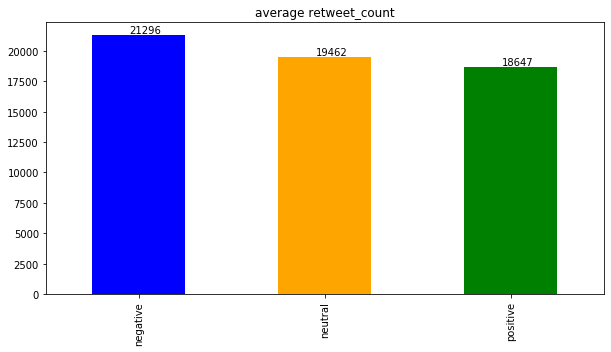

In [46]:
# average retweet_count
# more retweets on trump's negative tweets
# negative > neutral > positive
fig, ax = plt.subplots()  
for i, v in enumerate(retweet.values):
    ax.text(i-.05, v+200, str(int(round(v))), color='black')
retweet.plot(kind='bar', figsize=(10,5), color=['blue', 'orange', 'green'])
plt.xlabel('')
plt.title('average retweet_count')
plt.show()

In [47]:
# average favorite_count
favorite = trump.groupby('orientation')['favorite_count'].mean()
favorite.head()

orientation
negative    91465.953015
neutral     85416.959276
positive    86515.014238
Name: favorite_count, dtype: float64

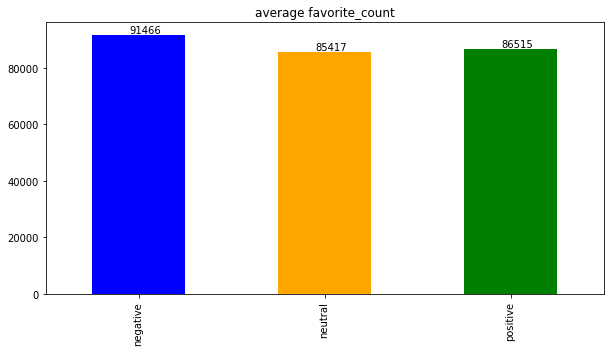

In [51]:
# average favorite_count
# more favorites on trump's negative tweets
# negative > positive > neutral, slightly different from retweet_count
fig, ax = plt.subplots()  
for i, v in enumerate(favorite.values):
    ax.text(i-.05, v+800, str(int(round(v))), color='black')
favorite.plot(kind='bar', figsize=(10,5), color=['blue', 'orange', 'green'])
plt.xlabel('')
plt.title('average favorite_count')
plt.show()

# k means

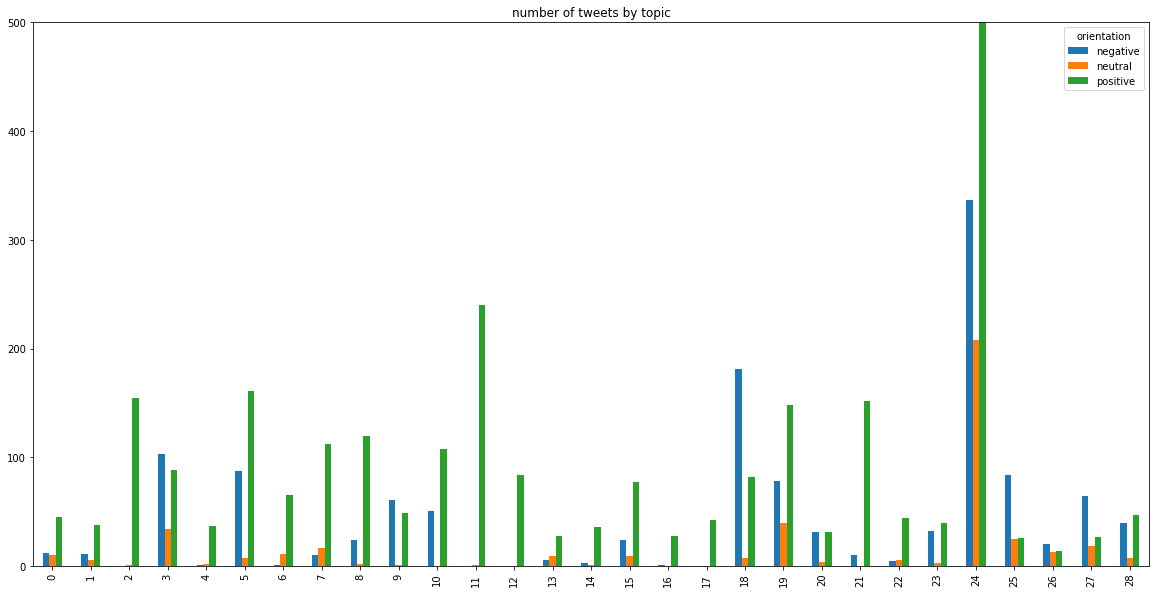

In [52]:
# number of tweets by entity in all clusters
k_cluster = trump[['k_cluster', 'orientation']].groupby(['k_cluster', 'orientation']).size().unstack()
k_cluster.plot(kind='bar', figsize=(20,10), ylim=(0,500))
plt.xlabel('')
plt.title('number of tweets by topic')
plt.show()

In [55]:
# top 10 cluster/entity
top_8 = trump[['k_cluster', 'orientation', 'favorite_count', 'retweet_count']]
top_8 = top_8[top_8['k_cluster'].isin([24, 18, 19, 5, 11, 3, 21, 10])]
top_8['k_cluster'] = top_8['k_cluster'].replace(24, 'Thanks to People').replace(18, 'Fake News')\
                    .replace(19, 'President Trump').replace(5, 'Country').replace(11, 'Great')\
                    .replace(3, 'Democratic Party').replace(21, 'Good').replace(10, 'New York')
top_8.columns = ['entity', 'orientation', 'favorite_count', 'retweet_count']
top_8.head()

,entity,orientation,favorite_count,retweet_count
0,Thanks to People,negative,156126.0,38037.0
1,Thanks to People,positive,34845.0,11170.0
3,Thanks to People,positive,56133.0,13626.0
4,Thanks to People,positive,65073.0,16955.0
5,Fake News,negative,205345.0,45115.0


In [56]:
# number of tweets
count = top_8.groupby(['entity', 'orientation']).size().unstack()
count

orientation,negative,neutral,positive
entity,,,
Country,87.0,7.0,161.0
Democratic Party,103.0,34.0,88.0
Fake News,181.0,7.0,82.0
Good,10.0,NaN,152.0
Great,NaN,1.0,240.0
New York,51.0,NaN,108.0
President Trump,78.0,40.0,148.0
Thanks to People,337.0,208.0,896.0


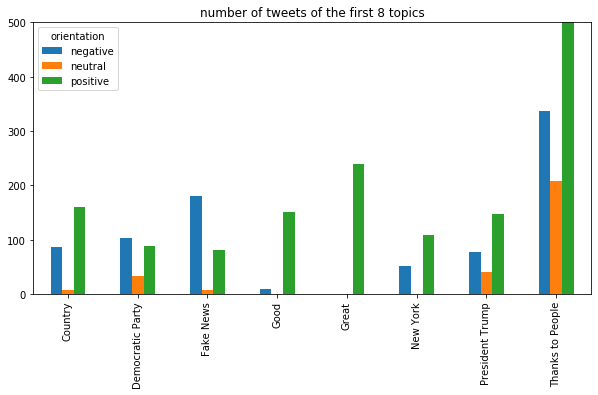

In [59]:
# number of tweets
# more negative tweets on Fake News / Democratic Party
count.plot(kind='bar', figsize=(10,5), ylim=(0,500))
plt.xlabel('')
plt.title('number of tweets of the first 8 topics')
plt.show()

In [60]:
# sum of retweet_count
retweet = top_8.groupby(['entity', 'orientation'])['retweet_count'].sum().unstack()
retweet

orientation,negative,neutral,positive
entity,,,
Country,1791733.0,137952.0,3232149.0
Democratic Party,2112630.0,616832.0,1760591.0
Fake News,4159240.0,116119.0,1585295.0
Good,199226.0,NaN,2723800.0
Great,NaN,3591.0,3324091.0
New York,1015110.0,NaN,1948229.0
President Trump,1591374.0,665310.0,2631755.0
Thanks to People,7269560.0,4080378.0,18050337.0


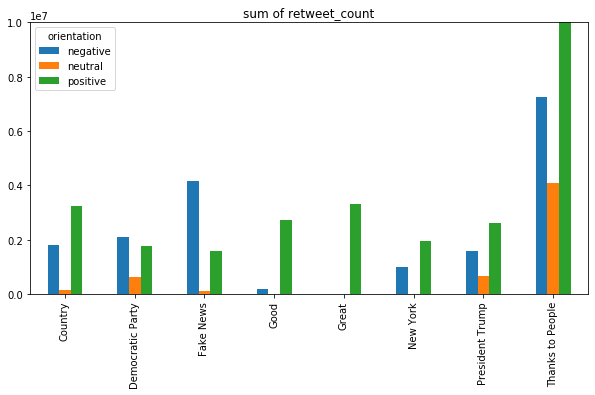

In [61]:
# sum of retweet_count
# similar distribution of number of tweets
retweet.plot(kind='bar', figsize=(10, 5), ylim=(0,1e7))
plt.xlabel('')
plt.title('sum of retweet_count')
plt.show()

In [62]:
# average of retweet_count
retweet = top_8.groupby(['entity', 'orientation'])['retweet_count'].mean().unstack()
retweet

orientation,negative,neutral,positive
entity,,,
Country,20594.632184,19707.428571,20075.459627
Democratic Party,20510.970874,18142.117647,20006.715909
Fake News,22979.226519,16588.428571,19332.865854
Good,19922.600000,NaN,17919.736842
Great,NaN,3591.000000,13850.379167
New York,19904.117647,NaN,18039.157407
President Trump,20402.230769,16632.750000,17782.128378
Thanks to People,21571.394659,19617.201923,20145.465402


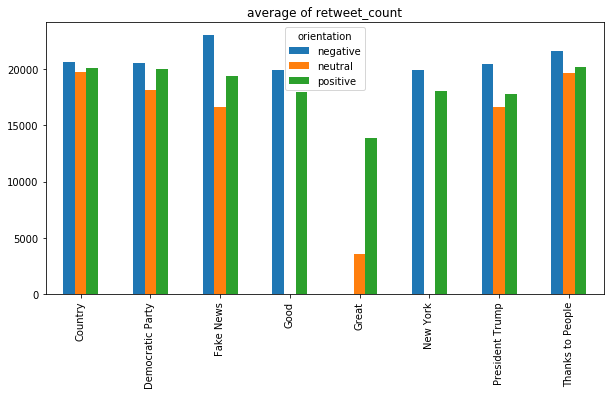

In [402]:
# average of retweet_count
# positive: Great
# all others are about negative tweets
retweet.plot(kind='bar', figsize=(10, 5))
plt.xlabel('')
plt.title('average of retweet_count')
plt.show()

In [403]:
# sum of favorite_count
favorite = top_8.groupby(['entity', 'orientation'])['favorite_count'].sum().unstack()
favorite

orientation,negative,neutral,positive
entity,,,
Country,7776896.0,689020.0,15221724.0
Democratic Party,8974588.0,2403340.0,7665873.0
Fake News,17688653.0,577428.0,7607673.0
Good,849875.0,NaN,12842438.0
Great,NaN,18091.0,16200424.0
New York,4483204.0,NaN,8907817.0
President Trump,6762902.0,2806257.0,11808563.0
Thanks to People,31621271.0,18278129.0,82435475.0


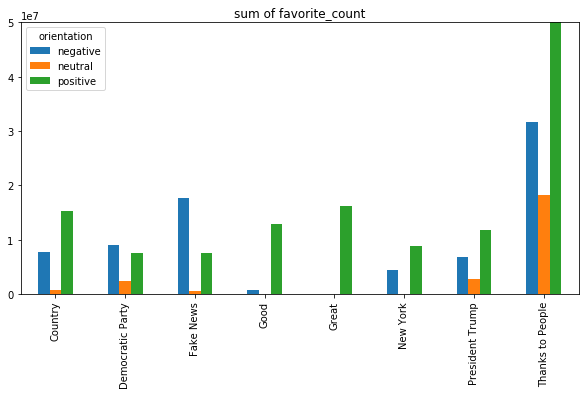

In [404]:
# sum of favorite_count
# similar distribution of number of tweets
favorite.plot(kind='bar', figsize=(10, 5), ylim=(0,5e7))
plt.xlabel('')
plt.title('sum of favorite_count')
plt.show()

In [405]:
# average of favorite_count
favorite = top_8.groupby(['entity', 'orientation'])['favorite_count'].mean().unstack()
favorite

orientation,negative,neutral,positive
entity,,,
Country,89389.609195,98431.428571,94544.869565
Democratic Party,87131.922330,70686.470588,87112.193182
Fake News,97727.364641,82489.714286,92776.500000
Good,84987.500000,NaN,84489.723684
Great,NaN,18091.000000,67501.766667
New York,87905.960784,NaN,82479.787037
President Trump,86703.871795,70156.425000,79787.587838
Thanks to People,93831.664688,87875.620192,92003.878348


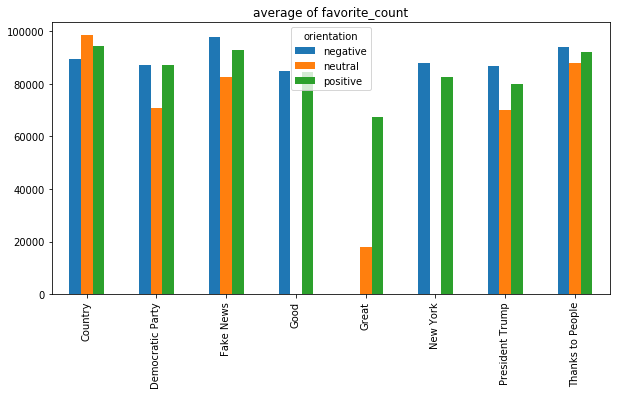

In [406]:
# average of favorite_count
# neutral: Country
# positive: Great
# all others are about negative tweets
favorite.plot(kind='bar', figsize=(10, 5))
plt.xlabel('')
plt.title('average of favorite_count')
plt.show()

# hierarchical clustering

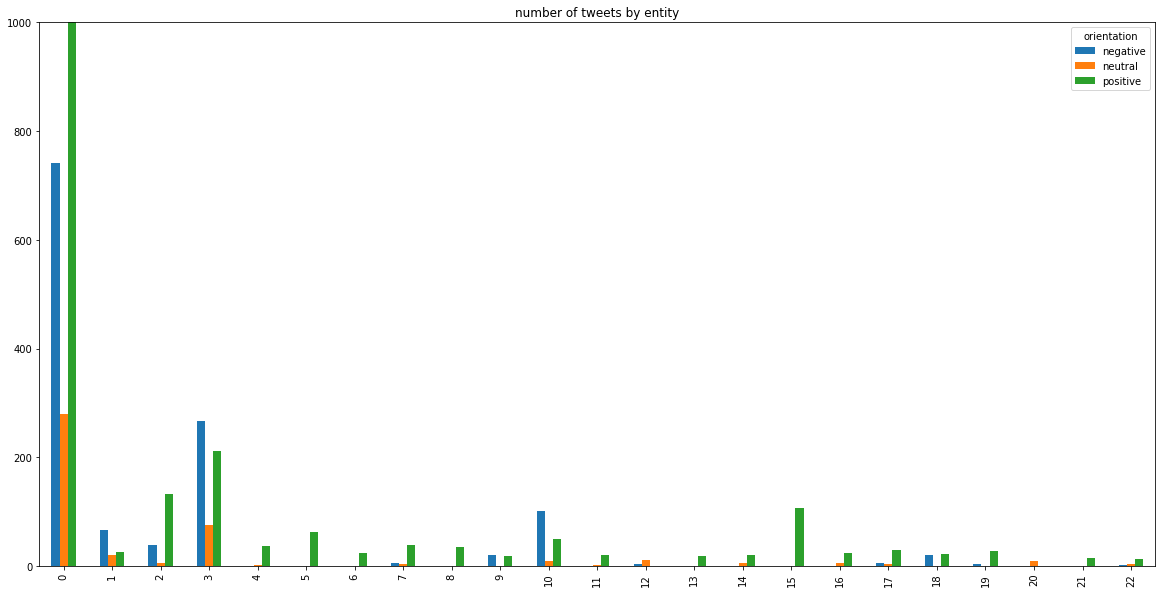

In [407]:
# number of tweets by entity in all clusters
a_cluster = trump[['a_cluster', 'orientation']].groupby(['a_cluster', 'orientation']).size().unstack()
a_cluster.plot(kind='bar', figsize=(20,10), ylim=(0,1000))
plt.xlabel('')
plt.title('number of tweets by entity')
plt.show()

In [408]:
top_8 = trump[['a_cluster', 'orientation', 'favorite_count', 'retweet_count']]
top_8 = top_8[top_8['a_cluster'].isin([0, 1, 2, 3, 10, 15, 5, 7])]
top_8['a_cluster'] = top_8['a_cluster'].replace(0, 'Thanks to People').replace(1, 'Whistleblower').replace(2, 'China')\
                    .replace(3, 'Democratic Party').replace(10, 'Fake News')\
                    .replace(15, 'Thanks').replace(5, 'Endorsement').replace(7, 'North Carolina')
top_8.columns = ['entity', 'orientation', 'favorite_count', 'retweet_count']
top_8.head()

,entity,orientation,favorite_count,retweet_count
0,Thanks to People,negative,156126.0,38037.0
1,Thanks to People,positive,34845.0,11170.0
2,Thanks to People,positive,33328.0,8521.0
3,Thanks to People,positive,56133.0,13626.0
4,Thanks to People,positive,65073.0,16955.0


In [409]:
# number of tweets
count = top_8.groupby(['entity', 'orientation']).size().unstack()
count

orientation,negative,neutral,positive
entity,,,
China,38.0,5.0,132.0
Democratic Party,267.0,76.0,211.0
Endorsement,NaN,NaN,63.0
Fake News,102.0,10.0,49.0
North Carolina,5.0,4.0,38.0
Thanks,NaN,NaN,106.0
Thanks to People,742.0,280.0,2088.0
Whistleblower,67.0,21.0,26.0


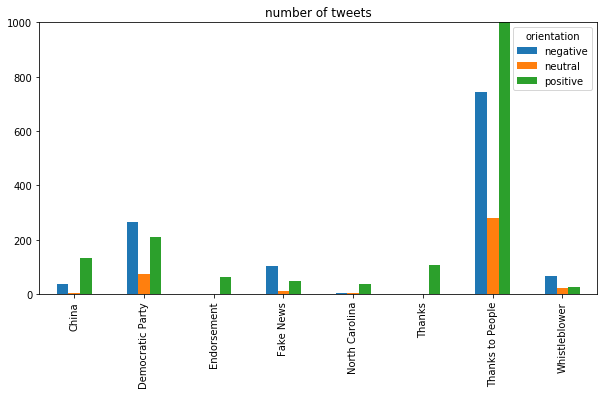

In [410]:
# tweet count
# negative: Democratic Party, Fake News, Whistleblower
# all others are about positive tweets
count.plot(kind='bar', figsize=(10,5), ylim=(0,1000))
plt.xlabel('')
plt.title('number of tweets')
plt.show()

In [411]:
# sum of retweet_count
retweet = top_8.groupby(['entity', 'orientation'])['retweet_count'].sum().unstack()
retweet

orientation,negative,neutral,positive
entity,,,
China,580888.0,108102.0,2162074.0
Democratic Party,5474385.0,1370405.0,4013697.0
Endorsement,NaN,NaN,682858.0
Fake News,2212526.0,98982.0,944840.0
North Carolina,79281.0,44380.0,464504.0
Thanks,NaN,NaN,1446345.0
Thanks to People,16356694.0,5688128.0,40543450.0
Whistleblower,1515568.0,405982.0,493598.0


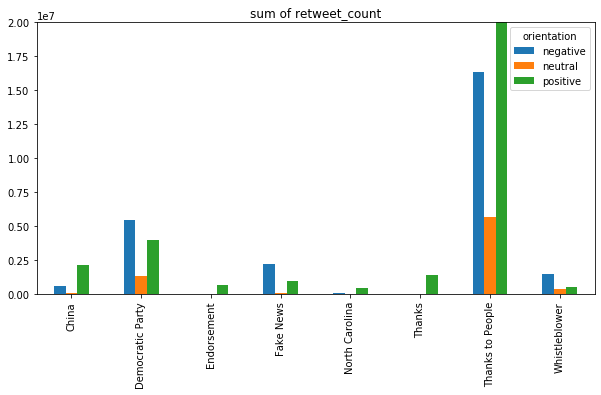

In [412]:
# sum of retweet_count
# similar distribution 
retweet.plot(kind='bar', figsize=(10, 5), ylim=(0, 2e7))
plt.xlabel('')
plt.title('sum of retweet_count')
plt.show()

In [413]:
# average of retweet_count
retweet = top_8.groupby(['entity', 'orientation'])['retweet_count'].mean().unstack()
retweet

orientation,negative,neutral,positive
entity,,,
China,15286.526316,21620.400000,16379.348485
Democratic Party,20503.314607,18031.644737,19022.260664
Endorsement,NaN,NaN,10839.015873
Fake News,21691.431373,9898.200000,19282.448980
North Carolina,15856.200000,11095.000000,12223.789474
Thanks,NaN,NaN,13644.764151
Thanks to People,22044.061995,20314.742857,19417.361111
Whistleblower,22620.417910,19332.476190,18984.538462


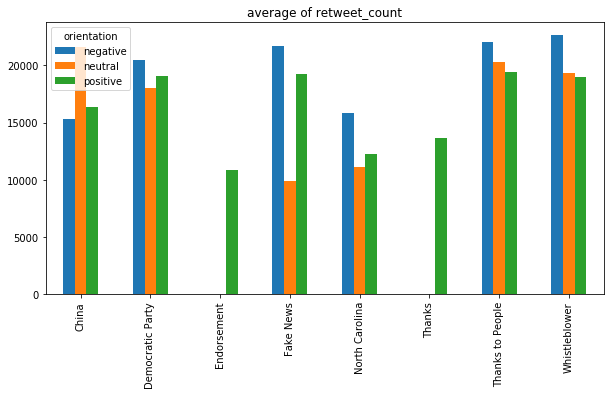

In [414]:
# average of retweet_count
# neutral: China
# positive: Endorsement, Thanks
# all others are about negative tweets
retweet.plot(kind='bar', figsize=(10, 5))
plt.xlabel('')
plt.title('average of retweet_count')
plt.show()

In [415]:
# sum of favorite_count
favorite = top_8.groupby(['entity', 'orientation'])['favorite_count'].sum().unstack()
favorite

orientation,negative,neutral,positive
entity,,,
China,2527688.0,494077.0,10243552.0
Democratic Party,23330259.0,5475775.0,17497371.0
Endorsement,NaN,NaN,2592410.0
Fake News,9324803.0,383005.0,4180492.0
North Carolina,330859.0,239529.0,2084882.0
Thanks,NaN,NaN,6350417.0
Thanks to People,70718519.0,25115046.0,187492570.0
Whistleblower,6166841.0,1576506.0,2024873.0


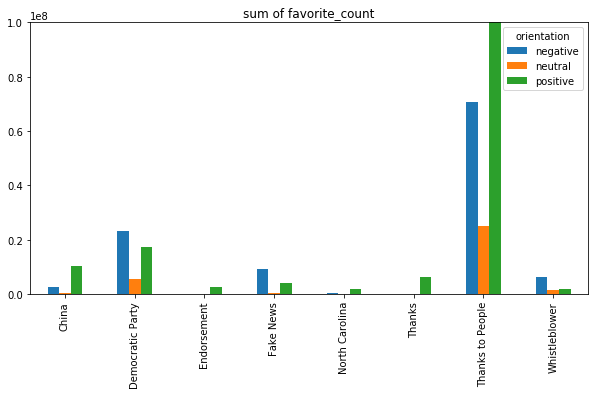

In [416]:
# sum of favorite_count
# similar distribution of number of tweets
favorite.plot(kind='bar', figsize=(10, 5), ylim=(0, 1e8))
plt.xlabel('')
plt.title('sum of favorite_count')
plt.show()

In [417]:
# average of favorite_count
favorite = top_8.groupby(['entity', 'orientation'])['favorite_count'].mean().unstack()
favorite

orientation,negative,neutral,positive
entity,,,
China,66518.105263,98815.400000,77602.666667
Democratic Party,87379.247191,72049.671053,82925.928910
Endorsement,NaN,NaN,41149.365079
Fake News,91419.637255,38300.500000,85316.163265
North Carolina,66171.800000,59882.250000,54865.315789
Thanks,NaN,NaN,59909.594340
Thanks to People,95307.977089,89696.592857,89795.292146
Whistleblower,92042.402985,75071.714286,77879.730769


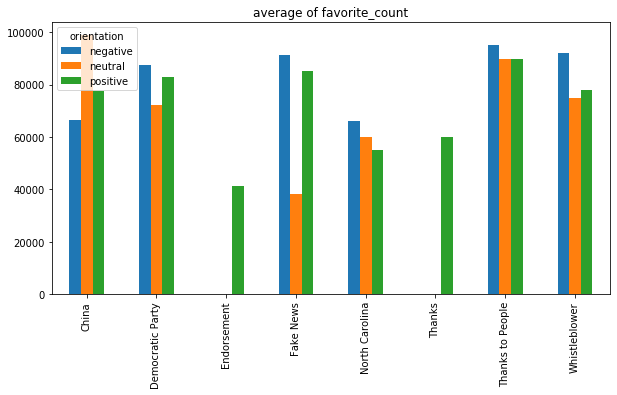

In [418]:
# average of favorite_count
# neutral: China
# positive: Endorsement, Thanks
# all others are about negative tweets
favorite.plot(kind='bar', figsize=(10, 5))
plt.xlabel('')
plt.title('average of favorite_count')
plt.show()

# time

In [419]:
# trump's orientation against hour
hour = trump.groupby(['hour', 'orientation']).size().unstack()
hour

orientation,negative,neutral,positive
hour,,,
0,35.0,14.0,74.0
1,7.0,5.0,22.0
2,2.0,NaN,5.0
3,1.0,1.0,6.0
4,4.0,1.0,9.0
5,5.0,1.0,10.0
6,52.0,9.0,97.0
7,125.0,33.0,238.0
8,145.0,40.0,283.0


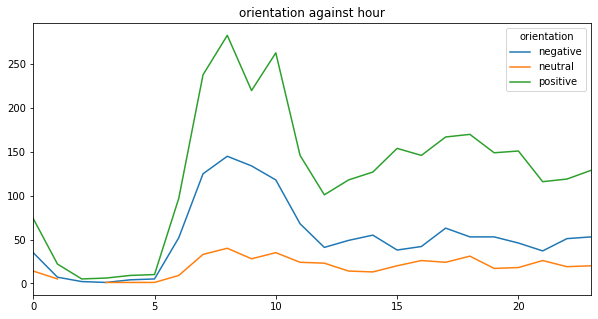

In [420]:
# trump's orientation against hour
# similar trend for all orientation, but he sent more tweets in the morning
hour.plot(kind='line', figsize=(10, 5))
plt.xlabel('')
plt.title('orientation against hour')
plt.show()

In [421]:
# trump's orientation against day_of_week
# 1 is Monday, etc
day_of_week = trump.groupby(['day_of_week', 'orientation']).size().unstack()
day_of_week

orientation,negative,neutral,positive
day_of_week,,,
1,193,50,420
2,163,54,483
3,186,83,468
4,187,78,449
5,170,69,469
6,157,55,378
7,221,53,353


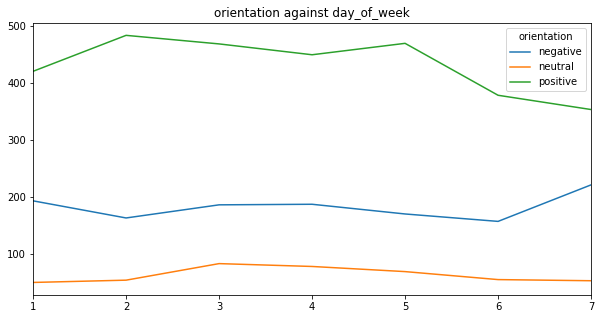

In [422]:
# trump's orientation against day_of_week
# 1 is Monday, etc
# it seems when trump sent more positive tweets on a day, he trent to send less negative tweets on the same day
# except on Saturday, amounts of both positive and negative tweets were decreasing
day_of_week.plot(kind='line', figsize=(10, 5))
plt.xlabel('')
plt.title('orientation against day_of_week')
plt.show()

In [423]:
# trump's orientation against month
trump['month_text'] = trump['year'].astype(str) + '-' + trump['month'].astype(str).str.pad(side='left', 
                                                                                           fillchar='0', width=2) 
month_text = trump.groupby(['month_text', 'orientation']).size().unstack()
month_text

orientation,negative,neutral,positive
month_text,,,
2019-05,113,22,238
2019-06,85,16,213
2019-07,123,28,301
2019-08,109,19,283
2019-09,126,39,269
2019-10,161,81,311
2019-11,101,48,214
2019-12,124,52,250
2020-01,90,39,214


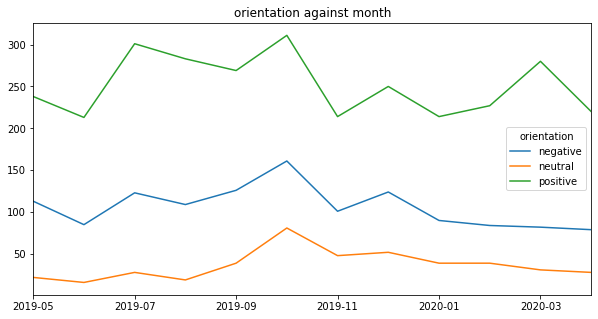

In [424]:
# trump's orientation against month
# 1 is Monday, etc
# similar trends of all orientation in all months
# except in 2020-03, there was an increase of amount of positive tweets, 
# but amount of negative and neutral tweets didn't change a lot
month_text.plot(kind='line', figsize=(10, 5))
plt.xlabel('')
plt.title('orientation against month')
plt.show()